In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Load the data and merge the two data sets on the same index
df_transaction = pd.read_csv('train_transaction.csv')
df_identity = pd.read_csv('train_identity.csv')
df = df_transaction.merge(df_identity, on='TransactionID', how='left')
df = df.sample(frac=1).set_index('TransactionID')
df.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3125225,0,2822262,28.217,C,9633,296.0,185.0,visa,138.0,debit,...,Samsung/SM-G532M,NaN,NaN,NaN,F,F,T,T,mobile,SM-G532M Build/MMB29T
3552866,0,15006657,107.950,W,18376,512.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3052333,0,1467693,226.000,W,15111,310.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3025006,0,938408,100.000,H,6931,481.0,150.0,mastercard,102.0,credit,...,edge 16.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
3498171,0,13379650,37.000,W,9500,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Compare Fraud to not Fraud
fraud = df.loc[df['isFraud'] == 1]
not_fraud = df.loc[df['isFraud'] == 0]

print("FRAUD", len(fraud), "| NOT FRAUD", len(not_fraud))

FRAUD 20663 | NOT FRAUD 569877


In [4]:
# Encode the labels into floats
encoded_columns = []
for column in df.columns:   
    if df[column].dtype=='object':
        encoded_columns.append(column)
        label_encoder = LabelEncoder().fit(list(df[column].values))
        df[column] = label_encoder.transform(list(df[column].values))
print("These columns have been encoded", encoded_columns)      
df[encoded_columns].head()

These columns have been encoded ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3125225,0,4,2,16,16,2,2,2,2,2,...,74,13,260,4,0,0,1,1,1,1190
3552866,4,2,2,16,32,1,1,1,3,2,...,74,103,260,4,2,2,2,2,2,1742
3052333,4,2,2,32,32,2,2,2,0,0,...,74,103,260,4,2,2,2,2,2,1742
3025006,1,2,1,16,32,2,2,2,3,2,...,42,71,132,3,1,0,1,1,0,1598
3498171,4,4,2,16,32,1,1,1,0,1,...,74,103,260,4,2,2,2,2,2,1742


In [5]:
# Clean data
df = df.apply(lambda x: x.fillna(x.mean()), axis=0)

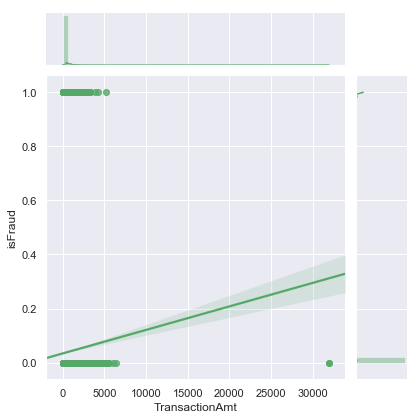

In [12]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(data=df, x='TransactionAmt', y='isFraud', color='g', kind='reg')
plt.show()

In [16]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [18]:
# C is a penalty term that is used to dis-incentivize overfitting
logistic = linear_model.LogisticRegression(C=1e5) 
logistic.fit(X_train, y_train)
print('Score : ', logistic.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score :  0.9650320046059538
